In [1]:
from settings import *

random_rho0s: setting seed=37719


In [2]:
qubits = TriangularLayoutA(m=m, cutoff=1, distance=0.9)
operations = [("rz", "A"), ("rx", "A"), ("rz", "A"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

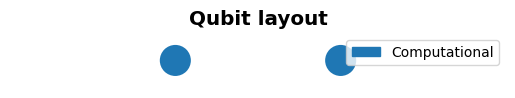

In [3]:
qubits.show_layout()

In [4]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, n_grad=10, max_count=200)

theta_opt = np.save("ham_theta_opt.npy", theta_opt)
thetas = np.save("ham_thetas.npy", thetas)
errors = np.save("ham_errors.npy", errors)

optimizer (optimization indices): setting seed=50449
Iteration: 0 
            Max gradient term: 0.018195717715469018 
            Current gradient: [ 0.01010961  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00180026  0.          0.          0.          0.
  0.          0.00763017  0.          0.01523875  0.          0.
  0.01819572  0.          0.          0.          0.0162192   0.
  0.          0.          0.          0.01095975  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00115227  0.          0.          0.          0.
  0.          0.          0.          0.01542492  0.          0.01779269
  0.          0.          0.          0.        ] 
            Current error: 0.17536785676645764 
            Current sigma va

C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 10 
            Max gradient term: 0.05561813179962016 
            Current gradient: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01961835 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01659813 0.         0.01753773
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02893514 0.         0.         0.
 0.         0.         0.02642422 0.04586318 0.         0.
 0.         0.         0.03585995 0.         0.00763636 0.01874437
 0.05561813 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ] 
            Current error: 0.06964258625967955 
            Current sigma values: (2, 0, 20.0)
Iteration: 20 
            Max gradient term: 0.011199241859230491 
            Current gradient

In [5]:
theta_opt = np.load("ham_theta_opt.npy")
thetas = np.load("ham_thetas.npy")
errors = np.load("ham_errors.npy")

In [6]:
theta_opt

array([ 0.580011  ,  0.66872752,  0.78746929,  0.61951365,  0.7291021 ,
        1.27212529,  0.27549483,  0.71225578,  0.9823133 ,  0.69425602,
        1.06877633,  0.95870909,  0.39492791,  0.74777246,  1.20050499,
        1.05524336,  0.82963298,  0.87818487,  1.49541039,  0.59683239,
        0.70722027,  0.99004886,  0.92513502,  0.72811431,  0.1962029 ,
        1.4256925 ,  0.80969162,  0.55240857,  1.27236591,  0.56434876,
        0.83583432,  0.88154434,  1.38088872,  0.66250727,  0.98404327,
        1.16047894,  1.08508203,  0.59364375,  0.67746101,  1.07502749,
        1.40272963,  0.58374277,  0.85574209,  1.05032556,  0.55754777,
        0.69107877,  0.81834625,  0.61327538,  1.23421143,  0.38706181,
        0.6659139 ,  0.39133206,  0.90073193,  0.76889648,  1.47592036,
       -0.11336336,  0.71294931,  1.00435822,  0.77993497,  0.56672472,
        0.4057705 ,  1.01069345,  0.45457154,  0.73993437,  1.08036602,
        0.50820935,  0.54033269,  0.9145147 ,  1.29625221,  0.66

In [7]:
from q_channel_approx.unitary_circuits import unitary_circuit_fac

In [8]:
ham = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)(theta_opt)
import qutip as qt
qt.Qobj(ham)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 8.68346860e-01-4.95941980e-01j -1.00687983e-03-1.91042241e-03j
  -1.71960980e-03-2.74532898e-03j  1.43345578e-04+3.24292062e-04j]
 [-1.13267024e-03-1.83868090e-03j  8.68528871e-01-4.95625342e-01j
  -8.27090715e-05-7.18390081e-05j -1.58019413e-03-2.43880540e-03j]
 [-1.48944847e-03-2.87676274e-03j -3.10400425e-05-1.02994572e-04j
   8.68537904e-01-4.95608855e-01j -6.97876348e-04-1.66683474e-03j]
 [ 1.96637318e-04+2.94188780e-04j -1.30073252e-03-2.59874565e-03j
  -1.08231609e-03-1.44701850e-03j  8.67502630e-01-4.97420698e-01j]]

In [9]:
from q_channel_approx.physics_defns import create_hamiltonian
create_hamiltonian(system)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.2 0.3 0. ]
 [0.2 0.  0.  0.3]
 [0.3 0.  0.  0.2]
 [0.  0.3 0.2 0.2]]

In [10]:
np.sum(ham.dot(ham.conj().T) - np.identity(2**m) )# check if unitary

(-5.498531317760236e-15+0j)

rho_rand_haar: seed=97881


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

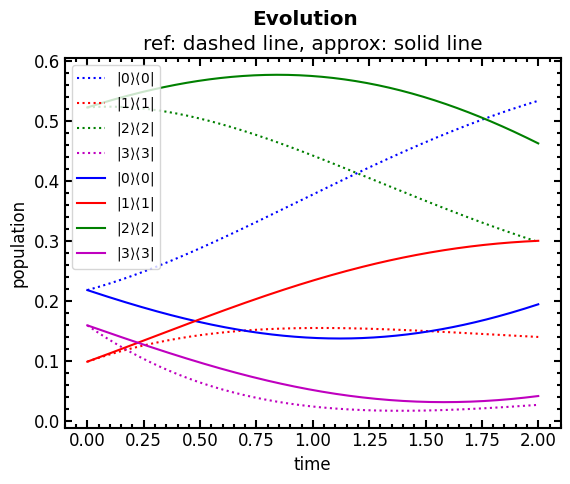

In [14]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(200, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.01, N=200, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

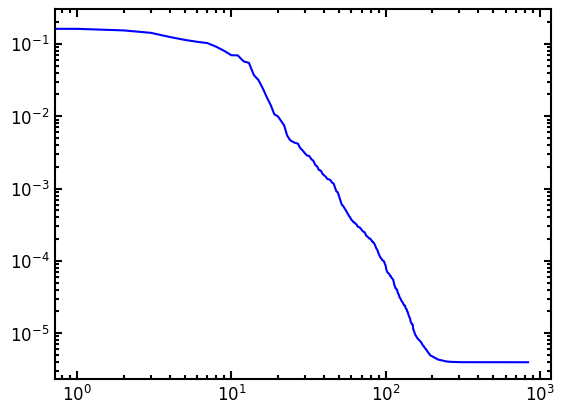

In [12]:
plt.loglog(errors)